<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2 - R4001

# Trabajo práctica de laboratorio 1 : Teoría Moderna y Filtrado activado
#### Lugano Damian - Leg 1756990

Fecha de entrega: 4/7/23

Integrantes:

+ Lugano Damian 
+ Nuñez Ana
+ Fiasche Nahuel

---------------------

### Tabla de contenidos

1. Objetivos
2. Descripción

    $\hspace{0.5cm}$ 2.1 UAF42 -Universal Active Filter

3. Análisis y desarrollo del filtro

    $\hspace{0.5cm}$ 3.1 Plantilla

    $\hspace{0.5cm}$ 3.2 Obtener el orden del filtro y el $\epsilon$

    $\hspace{0.5cm}$ 3.3 Simulación numérica en python

    $\hspace{0.5cm}$ 3.4 Sintesis del filtro

    $\hspace{1cm}$ 3.4.1 Sintesis de los valores de los componentes externos del circuito UAF42
    
    $\hspace{1cm}$ 3.4.2 Filtro RLC
        
4. Simulación circuital en LTspice

    $\hspace{0.5cm}$ 4.1 Resultados de la simulación circuital

    $\hspace{0.5cm}$ 4.2 Analisis de la simulación circuital


5. Armado y prueba del circuito

    $\hspace{0.5cm}$ 5.1 BOM (Bill of materilas)
    
    $\hspace{0.5cm}$ 5.2 Armado del circuito en protoboard

    $\hspace{0.5cm}$ 5.3 Laboratorio abierto 1: Lunes 12/6

    $\hspace{0.5cm}$ 5.4 Armado del circuito en placa perforada
    
    $\hspace{0.5cm}$ 5.5 Laboratorio abierto 2: Jueves 15/6

6. Medición en el Laboratorio

    $\hspace{0.5cm}$ 6.1 Setup de medición

    $\hspace{1cm}$ 6.1.1 Conexionado
    
    $\hspace{1cm}$ 6.1.2 Configuración del instrumental

    $\hspace{0.5cm}$ 6.2 Método de medición

    $\hspace{1cm}$ 6.2.1 Módulo

    $\hspace{1cm}$ 6.2.2 Fase y Retardo de grupo

    $\hspace{1cm}$ 6.2.3 Participación en las mediciones

    $\hspace{0.5cm}$ 6.3 Diagrama de tiempos de la medición

    $\hspace{0.5cm}$ 6.4 Resultados de la medición

    $\hspace{0.5cm}$ 6.5 Mediciones con el analizador de audio

7. Análisis de los resultados
8. Conclusiones


--------------------------------------------------
### **1. Objetivos**

+ Consolidar los conceptos de teoría moderna mediante la implementación circuital.
+ Simular e implementar el filtro con componentes activos de precisión.
+ Medir las partes de la función transferencia para frecuencias menores a 100 kHz.


### **2. Descripción**

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo.

En este caso se propone diseñar el filtro A, que es un filtro pasabajos con función de aproximación Chebyshev. A continuación su plantilla:

<figure>
<center>
<img src="./pics/plantilla.png" width = "800">
<figcaption> Figura 1. Plantilla del filtro A </figcaption>
</figure>

Para implementar la funcion transferencia del filtro diseñado se utilizará el circuito integrado UAF42 ([datasheet](https://www.ti.com/lit/ds/symlink/uaf42.pdf?ts=1653513515595&ref_url=https%253A%252F%252Fwww.ti.com%252Fproduct%252FUAF42%253Futm_source%253Dsupplyframe%2526utm_medium%253DSEP%2526utm_campaign%253Dnot_alldatasheet%2526DCM%253Dyes%2526dclid%253DCOTE4LXH-_cCFaCFlQIdQoELbA)).

#### 2.1. UAF42 - Universal Active Filter

El CI UAF42 es un filtro activo universal configurado para un amplio rango de filtros pasa bajos, pasa altos y pasa banda. Por otro lado posee capacitores integrados con una tolerancia al 0.5%. Esto permite obtener respuestas en frecuencia del filtro muy parecidas a las simulaciones.

<figure>
<center>
<img src=./pics/UAF42_1.png width = "800">
<figcaption> Figura 2. Circuito interno del UAF42 </figcaption>
</figure>

<figure>
<center>
<img src=./pics/UAF42_2.png width = "500">
<figcaption> Figura 3. PINOUT del UAF42 </figcaption>
</figure>


### **3. Análisis y desarrollo del filtro**

#### 3.1. Plantilla

Chebyshev : 
+ $f_c=1.5KHz$
+ $f_s=4.5KHz$
+ $\alpha_{MAX} = 0.5dB$
+ $\alpha_{MIN}=16dB$

#### 3.2. Obtener el orden del filtro y el $\epsilon$

Primero se establece la norma de frecuencia :

\begin{equation}
    \Omega_\omega=2 \pi f_c \hspace{1cm} \Longrightarrow \hspace{1cm} \omega_c=1 \hspace{0.5cm} y \hspace{0.5cm} \omega_s=3
\end{equation}

\begin{equation}
    \epsilon²=10^{\frac{\alpha_{max}}{10}}-1 = 0.122 \hspace{1cm} \Longrightarrow \epsilon=0.349
\end{equation}

\begin{equation}
    \alpha_{min}=10 \, log[ 1 + \epsilon² \, cosh²(n \, cosh^{-1}(\omega_s)) ]
\end{equation}

Se itera n: 

+ $\alpha_{min2} = 15.59 dB$
+ $\alpha_{min2} = 30.77 dB$

##### **Por lo tanto se elije orden n=3**

La transferencia de un cheby está caracterizada por:


\begin{equation}
    | T(S) . T(-S) | = | T(j\omega) |² = \frac{1}{1+\epsilon² \, C_3(\omega)²}
\end{equation}

Donde el polinomio de Cheby para orden 3 es $C_3(\omega)=2\omega \, C_2 - C_1 = 4\omega³ -2\omega$

Para evitar hacer el desarrollo matemática que conlleva el diseño de un chebyshev. Se utilizó el simulador numérico en python


#### 3.3. Simulación numérica en Python

In [1]:
#----------------- imports ---------------------
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle

In [2]:
#----------------------Definicion de las variables---------------------

xi = 0.349
n = 3
alpha_max = 0.5

<IPython.core.display.Math object>

z =  [] 
 p =  [-0.31322824+1.02192749j -0.62645649-0.j         -0.31322824-1.02192749j] 
 k = 0.7156937903107974


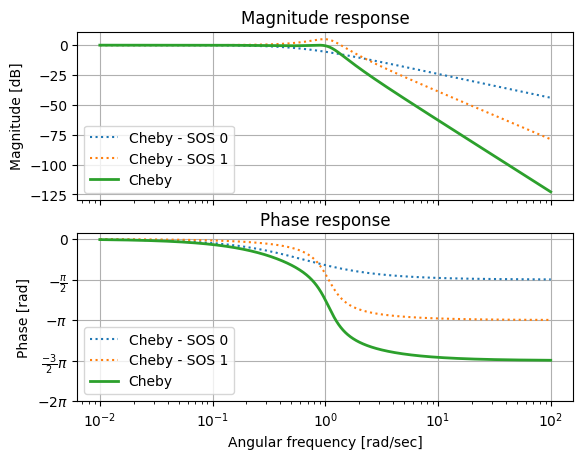

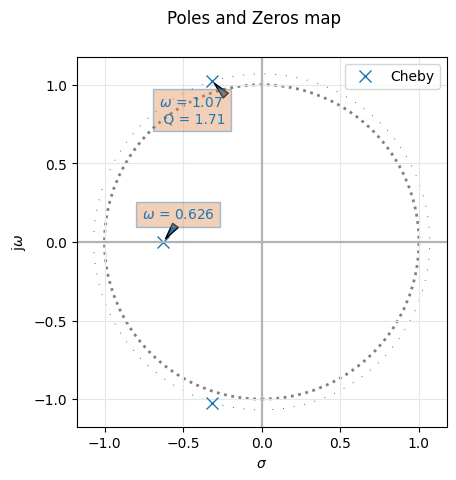

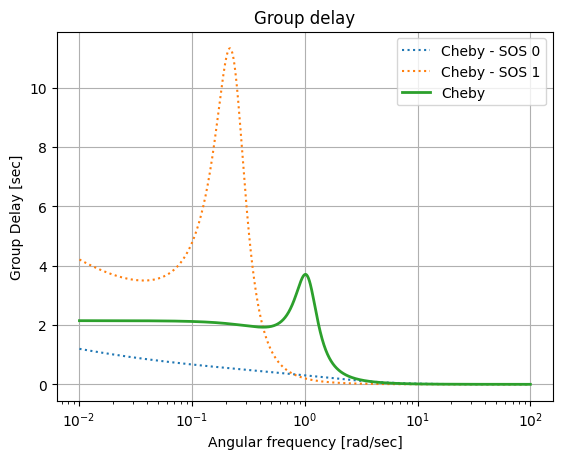

In [4]:
#---------------------------Definicion de H-------------------------

[z, p, k] = ss.cheb1ap(n, alpha_max)

[num, den] = ss.zpk2tf(z, p, k)

sos_lp = tf2sos_analog(num, den)
sos_lp[sos_lp < 1e-6] = 0.0

#-----------------------------Visualizacion----------------------------

pretty_print_SOS(sos_lp, mode='omegayq')
print("z = ", z, "\n", "p = ", p, "\n", "k =", k)
analyze_sys(sos_lp, "Cheby")

La transferencia resultante está caracterizada por:

\begin{equation}
    T(S)=\frac{\omega_{02} }{s + \omega_{02} } . \frac{\omega_{01}² }{s^2 + s \frac{\omega_{01}}{Q} + \omega_{01}^2} =\frac{0.6264 }{s + 0.6265 } . \frac{1.143 }{s^2 + s \frac{1.069}{1.706} + 1.069^2} 
\end{equation}

Donde se puede ver en el sistema de segundo orden (SOS, por sus siglas en ingles) que el valor de $Q=1.71$ y que $\omega_{01}=1.069\approx1$ y por otro lado el sistema de primer orden $\omega_{02}=0.626$

#### **3.4. Sintesis del filtro**

La primer etapa, es decir la SOS, se se implementará con el CI UAF42 y la segunda etapa de orden 1 se implementará un circuito pasivo RC. Por último se utilizará una etapa seguidora a la salida del filtro para evitar que la impedancia de las puntas de osciloscopio se ponga en paralelo al capacitor de salida y modifique los parámetros del filtro.

<figure>
<center>
<img src=./pics/blockdiagram.png width = "800">
<figcaption> Figura 4. Diagrama en bloques del filtro </figcaption>
</figure>

#### 3.4.1. Sintesis de los valores de los componentes externos del circuito UAF42

Se utilizaron las ecuaciones de diseño provistas por la hoja de datos para par de polos inversores, a partir de la siguiente configuración de componentes:

<figure>
<center>
<img src=./pics/design_eq.png width = "800">
<figcaption> Figura 5. Ecuaciones de diseño para par de polos inversores </figcaption>
</figure>

Utilizando dichas ecuaciones, se desarrolló un sistema de ecuaciones para obtener los valores de los componentes externos, es decir RG, RQ y el par RF1 RF2.

Primero se debe tener en cuenta que $R_1=R_2=R_4=50K$ y que $C_1=C_2=1000pF$. Por lo tanto:

+ $\omega_{01}²=\frac{1}{R_{F1}.R_{F2}.C²}=1²$

+ $Q=(1+\frac{R_4}{R_G}) \frac{1}{\frac{1}{R_1}+\frac{1}{R_2}+\frac{1}{R_G}} (\frac{1}{R_1 . R_2})^{1/2} = 1.706$

+ $A_{LP}=\frac{R_1}{R_G}=1$

Sin embargo para obtener el valor de los componetes desnormalizados, se deberá desnormalizar la transferencia primero.

\begin{equation}
    T1(S)=\frac{1.143 }{s^2 + s \frac{1.069}{1.706} + 1.069^2} \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} \frac{1.143 }{\frac{s^2}{\Omega\omega²} + \frac{s}{\Omega\omega} \frac{1.069}{1.706} + 1.069^2}
\end{equation}

\begin{equation}
    T1(S)=\frac{1.143  \Omega\omega² }{s^2 + s \hspace{0.1cm} \Omega\omega \hspace{0.1cm} \frac{1.069}{1.706} + 1.069^2 \hspace{0.1cm} \Omega\omega²}
\end{equation}

Recordando que $\Omega\omega=\omega_p=2 \pi f_p \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} \Omega\omega=3000\pi$

\begin{equation}
    T1(S)=\frac{ 101.5\times10⁶ }{s^2 + s \frac{10.07\times10³}{1.706} + 101.5\times10⁶}
\end{equation}

A partir de esto. Ahora:

\begin{equation}
\omega_{01}²=\frac{1}{R_{F1}.R_{F2}.10^{-18}}=\frac{10^{18}}{R_{F1}.R_{F2}} \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_{F1}.R_{F2}=\frac{10^{18}}{\omega_{01}²}=\frac{10^{18}}{101.5\times10⁶} \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_{F1}.R_{F2} = 9.852\times10⁹
\end{equation}

\begin{equation}
Adoptando \hspace{0.5cm} \rightarrow  R_{F1}=R_{F2} \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_{F1}=R_{F2}\approx99.25K\Omega 
\end{equation}

Por otro lado, la ganancia:

\begin{equation}
A_{LP}=\frac{R_1}{R_G}=1 \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_G=R_1=50K\Omega
\end{equation}

Por último el Q:

\begin{equation}
Q=(1+\frac{R_4}{R_Q}) \frac{50K\Omega}{3} (\frac{1}{(50K\Omega)²})^{1/2} = (1+\frac{R_4}{R_Q}) \times \frac{1}{3} \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_Q=12.14K\Omega
\end{equation}

Por lo que finalmente, pasando todos los valores de componentes a valores comerciales queda:

+ $R_{F1}=R_{F2}=100K\Omega$
+ $R_G=50K\Omega \hspace{0.5cm} \rightarrow$ se puede hacer con 2 resistencias de 100K en paralelo
+ $R_Q=12K\Omega$

Es importante tener en cuenta que la fase del filtro estará $\pi$ por arriba por usar una configuración inversora para la SOS.

#### 3.4.2 Filtro RC

Para sintetizar la transferencia de primer orden se utilizará una resistencia con un capacitor en derivacion.

<figure>
<center>
<img src=./pics/filtroRC.png width = "500">
<figcaption> Figura 6. Circuito filtro RC </figcaption>
</figure>

Su transferencia está caracterizada de la siguiente manera:

\begin{equation}
    T(S)=\frac{\omega_o}{s+\omega_o}=\frac{\frac{1}{R_x.C_x}}{s+\frac{1}{R_x.C_x}}=\frac{0.6264 }{s + 0.6265 }
\end{equation}

Para obtener el valor de los componentes, se tomó como norma de impedancia al capacitor de manera de proponer un valor comercial de capacitancia. Luego, en base al valor de resistencia necesitado, se utilizará un valor comercial cercano o un trimpot.

Entonces $\hspace{0.5cm} \Longrightarrow \hspace{0.5cm} C=1$

De esta manera $ \hspace{0.5cm} T(s)=\frac{\frac{1}{R_X}}{s+\frac{1}{R_X}}  \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} \frac{1}{R_X}=0.626 \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} R_X=1.6$

Por último, se propone como valor de capacitor $C_x=10nF$. Por lo tanto:

$C=\frac{C'}{\Omega_z . \Omega_\omega}=10nF$

$\Omega_z=\frac{C'}{C . \Omega_\omega} = \frac{1}{10nF . 3000 \pi} = 10.61K\Omega$

$R_x=R_x' . \Omega_Z=16.976K\Omega$

Por lo tanto se adoptará $R_x=17K\Omega$


### **4. Simulación circuital en LTspice**

#### 4.1 Resultados de la simulación Circuital

<figure>
<center>
<img src=./pics/circuitofinal.png width = "1000">
<figcaption> Figura 7. Diagrama esquemático del filtro pasabajo </figcaption>
</figure>

<figure>
<center>
<img src=./pics/simulacion1.png width = "1000">
<figcaption> Figura 8. Simulación filtro pasabajo </figcaption>
</figure>

<figure>
<center>
<img src=./pics/GroupDelay.png width = "1000">
<figcaption> Figura 8.1 Group delay del filtro pasabajo </figcaption>
</figure>

#### 4.2 Analisis de la simulación circuital

Al analizar los resultados de la simulación circuital, se puede observar que el máximo ripple en la banda de paso no supera los 0.5dB, y que la ganancia para la frecuencia de paso $G(1.5KHz)\approx -0.5dB$. Además, la ganancia para la frecuencia de stop $G(4.5KHz)\approx -30dB$.

Por otro lado, al analizar la fase, se puede observar que en total se desarrolla $(\pi;-\frac{\pi}{2})$ y que su punto de simetría, es decir donde se desarrolla la mitad de la fase, es la frecuencia de paso $\varphi(f_p)=\frac{\pi}{4}$.

Por último, de destaca que el retardo de grupo para frecuencias bajas es $D(10Hz)=228\mu S$ y para la frecuencia de paso es $D(f_p)=400\mu S$.

Los resultados de la simulación sugieren que el diseño está correctamente desarrollado ya que el filtro cumple con la plantilla pedida.

### **5. Armado y prueba del circuito**

Luego del diseño del filtro pasabajos, se armó un prototipo del circuito en protoboard para hacer las primeras pruebas y cercionarse de que lo diseñado se corresponda con la realidad. Para ello, primero se determinó como implementar ciertos valores de resistencias no comerciales y que resistencias debían ser variables para poder ajustar los parámetros importantes del circuito:

+ $R_G=50K\Omega \rightarrow \,$ 2 resistencias de 100K en paralelo 
+ $R_x=17K\Omega \rightarrow \,$ 1 resistencia de 15K + preset de 5K . De manera de poder ajustar la $\omega_{02}$
+ $R_{F1}=R_{F2}=100K\Omega \rightarrow \, R_{F1}$ se implementará con 91K + preset de 25K y $R_{F2}=100K\Omega$ . De manera de poder ajustar la $\omega_{01}$ solo con una resistencia, ya que la condicion es que sean iguales.
+ $R_Q=12K\Omega \rightarrow \,$ 1 resistencia de 10K + preset de 5K . De manera de poder ajustar el Q de la SOS

#### 5.1 BOM (Bill of Materials)

Una vez definido los criterios, se armó la [lista de materiales](https://docs.google.com/spreadsheets/d/1d7B98JfX_5mAPVnY1gbowpdec_9k8ott/edit?usp=sharing&ouid=118245099361192824123&rtpof=true&sd=true) con sus respectivos precios, actualizados a la fecha de entrega del presente trabajo.

<figure>
<center>
<img src=./pics/BOM.png width = "600">
<figcaption> Tabla 1. BOM </figcaption>
</figure>

#### 5.2 Armado del circuito en protoboard

Para el armado del protoboard, se tuvo en cuenta setear el valor correspondiente a cada preset antes del conexionado de manera de probar el circuito con los valores exactos obtenidos del diseño.

<figure>
<center>
<img src=./pics/proto.jpg width = "800">
<figcaption> Figura 9. Circuito en protoboard </figcaption>
</figure>

#### <u>5.3. Laboratorio abierto 1 : Lunes 12/6</u>

En la primera sesión del laboratorio abierto se probó el circuito en protoboard de manera de detectar de manera temprana algun error tanto en el diseño como en el conexionado.

<figure>
<center>
<img src=./pics/Lab1/lab1.jpg width = "800">
<figcaption> Figura 10. Set up de medición </figcaption>
</figure>

Antes de comenzar con las mediciones, primero se sometió al generador de señal bajo una carga de $1K\Omega$ para comprobar que funcione correctamente. Luego se evaluó que ningún componente esté mal conectado o que la alimentación del integrado esté en cortocircuito. Además se fijó la corriente de la fuente en un valor de $50mA$ de manera de no quemar el CI frente a un posible cortocircuito.

Una vez hecho esto, se alimentó al circuito y se excitó al filtro con una señal senoidal de 2VPP. Se hicieron mediciones en 3 puntos:

+ $f=1KHz$
+ $f=1.5KHz \rightarrow f_c$
+ $f=4.5KHz \rightarrow f_s$

Las mediciones obtenidas en el osciloscopio fueron las siguientes:
<figure>
<center>
<img src=./pics/Lab1/Lab1_1KHz.bmp width = "500">
<figcaption> Figura 11. Medicion en 1kHz (1) </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab1/Lab1_1.5KHz.bmp width = "500">
<figcaption> Figura 12. Medicion en 1.5kHz </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab1/Lab1_4.5KHz.bmp width = "500">
<figcaption> Figura 13. Medicion en 4.5kHz </figcaption>
</figure>

NOTA 0: señal de salida, canal 1 (amarillo) y señal de entrada, canal 2 (celeste).

NOTA 1: Es importante aclarar que en la medición con 1KHz, al momento de sacar la captura de pantalla, el osciloscopio estaba mal configurado. La señal de entrada estaba multiplicada x0.5. Si bien corregimos el error en el osciloscopio y comprobamos que la ganancia era 0dB, se olvidó de repetir la captura.

Analizando las mediciones con el osciloscopio se infiere que para 1KHz, la tensión VRMS es aproximadamente igual tanto para la salida como para la entrada, por lo que presenta una ganancia de 0dB. Por otro lado, para la frecuencia de paso $f_p$=1K5Hz la atenuación se la calculó como $\alpha_{max}=20\,log(\frac{vout_{rms}}{vin_{rms}})=20\,log(\frac{628mV}{724mV})=-1.24dB$. Finalmente, para la frecuencia de stop de $f_s$=4K5Hz la atenuación se la calculó como $\alpha_{min}=20\,log(\frac{vout_{rms}}{vin_{rms}})=20\,log(\frac{20.5mV}{724mV})=-31dB$.

De esta experiencia, se comprobó que el filtro no cumple con la atenuación máxima pedida en la banda de paso. Sin embargo, el grupo decidió no modificar los valores de los preset, sino probar armar una placa perforada que tenga un mayor soporte físico, facilidad de medición para evitar falsos contactos y desconexiones. Además se vio la necesidad de facilitar las conexiones externas necesarias y reducir la cantidad de cables.

#### 5.4. Armado del circuito en placa perforada

El armado del circuito en la placa experimental se basó en el layout de componentes utilizados en el protoboard. Por lo tanto se hizo uso de los componentes, cables y conectores ya testeados y medidos previamente. 

El diagrama esquemático del circuito es el mismo que el simulado en el LTspice pero con dos capacitores electrolítocos de $47\mu F$ y dos capacitores cerámicos de $100nF$ de bypass en paralelo para reducir el ruido de la fuente.

<figure>
<center>
<img src=./pics/placa_comp.jpg width = "800">
<figcaption> Figura 14. Placa del lado de los componentes </figcaption>
</figure>

<figure>
<center>
<img src=./pics/placa_sold.jpg width = "800">
<figcaption> Figura 15. Placa del lado de las soldaduras </figcaption>
</figure>

Se puede observar que en el diseño de la placa se hizo hincapie en tener mayor facilidad para las conexiones, utilizando cables pre armados y conectores especiales. Por ejemplo, para ingresar o medir señal, se implementó una pinera macho en su entrada y su salida para poder enganchar la punta del osciloscopio y evitar falsos contactos al sostenerla con la mano. Por otro lado, tambíen se agregaron unos conectores especiales para los cocodrilos de referencia a masa del instrumental y la fuente, ya que son varios y su mal conexionado puede introducir ruido al filtrado. Por último, se escribió a mano el nombre de los conectores para no cometer equivocaciones al hacer las conexiones.

#### <u>5.5. Laboratorio Abierto 2: Jueves 15/6</u>

Una vez armado el circuito en la placa perforada, se volvió al laboratorio abierto. Al igual que en la anterior ocasión, se tomaron los recauados necesarios tanto con la instrumentación como con el circuito, además la señal utilizada para excitar al filtro fue también una señal senoidal con una tensión pico a pico de 2V y frecuencia variable.

Variando los presets, se hizo el ajuste fino necesario para que el filtro cumpla con la plantilla. Luego se llevó a cabo un barrido en las siguientes frecuencias para la verificación de la transferencia:

+ $100Hz$
+ $500Hz$
+ $1KHz$
+ $1K5Hz$
+ $1K55Hz \rightarrow f_p: $ frecuencia de paso experimental
+ $2KHz$
+ $3KHz$
+ $4K5Hz \rightarrow f_s$
+ $5KHz$

A continuación se visualizarán los oscilogramas para las frecuencias más relevantes:

<figure>
<center>
<img src=./pics/Lab2/lab2_100Hz.bmp width = "500">
<figcaption> Figura 16. Medicion en 100Hz </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab2/lab2_1KHz.bmp width = "500">
<figcaption> Figura 17. Medicion en 1KHz </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab2/lab2_1K5Hz.bmp width = "500">
<figcaption> Figura 18. Medicion en 1K5Hz </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab2/lab2_1K55Hz.bmp width = "500">
<figcaption> Figura 19. Medicion en 1K55Hz : fp experimental </figcaption>
</figure>

<figure>
<center>
<img src=./pics/Lab2/lab2_4K5Hz.bmp width = "500">
<figcaption> Figura 20. Medicion en 4K5Hz : fs</figcaption>
</figure>

Analizando los resultados se puede observar que la ganancia en la banda de paso es de 0dB y que para $f=1.5KHz$ la ganancia es de $20\,log(\frac{vout_{rms}}{vin_{rms}}=20\,log(\frac{696mV}{709mV}))=-0.16dB$. La atenuación máxima pedida por la plantilla $\alpha_{max}=0.5dB$ se alcanza para una frecuencia de aproximadamente 1k55Hz, por lo que se deduce que la frecuencia de paso del circuito está corrida unos 50Hz. Dicho error es tan solo del 3%, lo cual se considera dentro del rango aceptable. Por otro lado la atenuación en la banda de stop para la frecuencia $f_s=4K5Hz$ resultó $20\,log(\frac{vout_{rms}}{vin_{rms}}=20\,log(\frac{23,8mV}{705mV}))=-29.43dB$.

De esta segunda experiencia se concluye que el filtro diseñado e implementado cumple con la plantilla y está listo para hacer la medición final en el laboratorio.

--------------
### 6. Medición en el Laboratorio 

#### 6.1 Setup de medición

<u> Numero de serie del instrumental utilizado </u>

+ Fuente 1: NG1811 ; Fuente 2: NG1362
+ Osciloscopio : NG1851
+ Generador de señales : NG1907

##### 6.1.1 Conexionado
Lo primero que se hizo fue el conexionado del instrumental con la placa. Para ello se tuvo en cuenta que las conexiones debían minimizar el uso de cables, por un lado para tener una referencia a masa que no ingrese ruido al circuito y por otro lado, para medir cómodamente. Se destaca que se conectó al canal 1 del osciloscopio la señal de entrada y al canal 2 la señal de salida.

A continuación un diagrama del conexionado y setup de medición:


<figure>
<center>
<img src=./pics/LabFinal/diag_conexion.png width = "600">
<figcaption> Figura 21. Diagrama de conexión </figcaption>
</figure>

<figure>
<center>
<img src=./pics/LabFinal/Conexionado.jpg width = "800">
<figcaption> Figura 22. Setup de medición </figcaption>
</figure>

##### 6.1.2 Configuración del instrumental

<u>Fuente partida </u>

Para armar la fuente partida se utilizaron dos fuentes simples en serie. Por otro lado, se configuró individualmente una tensión de 15V y el límite de corriente en 0.05A de manera de no dañar al circuito integrado frente a un cortocircuito en la alimentación.

<figure>
<center>
<img src=./pics/LabFinal/fuentePartida.png width = "600">
<figcaption> Figura 23. Armado de fuente partida con fuentes simples </figcaption>
</figure>

<u>Osciloscopio </u>

Dentro de las configuraciones más relevantes del osciloscopio, se estableció que la imagen visualizada sea un promedio de 4 mediciones para disminuir los efectos del ruido y medir una señal más estable. Por otro lado se configuró el trigger en la señal de entrada, y por último, se compensaron las puntas del osciloscopio con el tornillo disponible en su conector, de manera que en x10 la señal de prueba se vea como una cuadrada perfecta.

<u>Generador de señales </u>

Se testeó al generador de señal, configurado con una señal senoidal de 10Vpp, bajo una carga de 1K y se observó con el osciloscopio que al conectar la carga, la señal de salida disminuía unos 100 mV.

Por otro lado, al hacer pruebas con el filtro, se observó que la señal empezaba a distorsionar para una senoidal de 18Vpp. Por lo tanto se determinó que la señal de prueba fuera de 10Vpp para poder aprovechar el rango dinámico del osciloscopio y no medir señales muy chicas en la banda de stop del filtro.

#### 6.2 Metodo de medición

<u> 6.2.1 Módulo </u>

Para medir el módulo se decidió utilizar la tensión Vrms de las señales y no la tensión Vmax o Vhi del osciloscopio ya que se consideró que es la menos sensible al ruido y por lo tanto, la más estable. Sin embargo, se observó que la tensión Vrms que marcaba el osciloscopio no era consistente, por lo que se decidió utilizar los cursores, tomar el dato de la tensión pico y luego calcular la Vrms. Para obtener la ganancia, se calculó la tensión Vrms de la señal de entrada, que se mantuvo constante, y de la salida y a partir de estos datos, se calculó la ganancia como : 

\begin{equation}
    G[dB]=20\,log(\frac{Vout_{RMS}}{Vin_{RMS}})
\end{equation}

Se destaca que los cálculos se hicieron en una planilla de excel para mayor agilidad.


<u> 6.2.2 Fase y Retardo de grupo </u>

Como no se puede medir la fase y el retardo de grupo directamente, el procedimiento fue medir el retardo de fase, es decir la diferencia de tiempo entre la señal de entrada y la señal de salida. 

Al hacer las mediciones, se observó que para frecuencias bajas la señal de entrada y de salida estaban desfasadas perfectamente 180°(Figura 24). Se infirió que esto se debe al uso UAF42 en configuración inversora y por lo tanto se determinó tomar como punto de partida la diferencia de tiempos entre el pico positivo de la señal de entrada y el pico negativo de la señal de salida, como se muestra en la Figura 25. 

<figure>
<center>
<img src=./pics/LabFinalOsciloscopio/DS0040.BMP width = "500">
<figcaption> Figura 24. Ejemplo de medición para baja frecuencias </figcaption>
</figure>

<figure>
<center>
<img src=./pics/LabFinalOsciloscopio/DS0048.BMP width = "500">
<figcaption> Figura 25. Ejemplo de medición del retardo de grupo </figcaption>
</figure>


A partir del retardo de grupo se puede calcular la fase de la siguiente manera :

\begin{equation}
    Vo(t)=A.sen( \omega t + \theta) \Longrightarrow Vi(t)=Vi.sen[ \omega (t + \frac{ \theta}{\omega})]
\end{equation}

Siendo el retardo de fase $\Delta T = \frac{\theta}{\omega}$. Finalmente, la fase :

\begin{equation}
    \varphi(j\omega)=\pi - \Delta T * \omega
\end{equation}

Por otro lado, el retardo de grupo se calcula como :

\begin{equation}
    D=-\frac{\partial \varphi}{\partial \omega}
\end{equation}

Como no se tiene la función fase continua, sino que solo se tienen puntos de la fase para determinadas frecuencias, no se podrá calcular la derivada. Sin embargo, se puede calcular el retardo de grupo como un delta de fase sobre un delta de omega:

\begin{equation}
    D=-\frac{\Delta \varphi}{\Delta \omega} = \frac{\varphi_2 - \varphi_1}{ 2\pi(f_2-f_1)}
\end{equation}

<u> 6.2.3 Participación en las mediciones </u>

Para hacer las mediciones, se dividieron las tareas entre los integrantes, de manera de trabajar eficientemente, de la siguiente manera:

+ Manejo del osciloscopio y lectura de resultados - Nuñez
+ Manejo del generador de funciones y supervisión del circuito - Lugano
+ Toma de nota de los resultados y calculos en excel - Fiasche

#### 6.3 Tabla de tiempos de la medición

<figure>
<center>
<img src=./pics/LabFinal/DiagTiempos.png width = "800">
<figcaption> Tabla 2. Tabla de tiempos de la medición </figcaption>
</figure>


#### 6.4 Resultados de las mediciones

A medida que se fueron hiciendo las mediciones, se fueron anotando los resultados en una [planilla de excel](https://docs.google.com/spreadsheets/d/1cGpx7R0_h7a8vPd_6iyxOAZM3XfIzZY7/edit?usp=sharing&ouid=118245099361192824123&rtpof=true&sd=true) con el objetivo de agilizar los calculos.

Es importante destacar que las mediciones solo llegaron hasta 10KHz ya que para frecuencias mayores el nivel de ruido era apreciable y las mediciones no resultaron del todo confiables.

La tabla de mediciones relacionadas al módulo de la transferencia del filtro es la siguiente:

<figure>
<center>
<img src=./pics/LabFinal/Tabla1.png width = "1500">
<figcaption> Tabla 3. Tabla de mediciónes del módulo </figcaption>
</figure>

Por otro lado la tabla de mediciones relacionadas con la fase y el retardo de grupo del filtro es la siguiente:

<figure>
<center>
<img src=./pics/LabFinal/Tabla2.png width = "1000">
<figcaption> Tabla 4. Tabla de mediciones del Retardo de Fase </figcaption>
</figure>

#### 6.5 Mediciones con el analizador de audio

Finalmente en el laboratorio se hicieron mediciones del filtro con el analizador de audio, que reconstruye la respuesta en frecuencia del sistema a partir de una serie de muestras. Primero, se configuró al equipo para que tome 100 muestras en un rango de frecuencias entre 10Hz y 40KHz para obtener el módulo de la respuesta en frecuencia del filtro, los resultados se pueden observar en la Figura 26. Luego se hicieron 100 mediciones para un rango más acotado de frecuencias, entre 10Hz y 3KHz, para ver con detalle la banda de paso, la medición se puede ver en la Figura 27. Por último se hicieron 100 mediciones entre 10Hz y 10KHz para poder observar la fase del filtro, Figura 28.

<figure>
<center>
<img src=./pics/LabFinal/AAmod1.jpeg width = "600">
<figcaption> Figura 26. Módulo del filtro con el analizador de audio </figcaption>
</figure>

<figure>
<center>
<img src=./pics/LabFinal/AAmod2.jpeg width = "600">
<figcaption> Figura 27. Zoom del módulo del filtro en la frecuencia de paso con el analizador de audio</figcaption>
</figure>

<figure>
<center>
<img src=./pics/LabFinal/AAfase.jpeg width = "600">
<figcaption> Figura 28. Fase del filtro con el analizador de audio </figcaption>
</figure>

### 7. Análisis de los Resultados

El analisis de los resultados se hará con los valores medidos y calculados junto con sus gráficos desarrollados en excel, para una fácil visualización de los datos. Además se comparará los resultados de las mediciones hechas en el osciloscopio con las del analizador de audio.

Los resultados de la medición en relación a la ganancia indican, por un lado, que la banda de paso no presenta un riple mayor a 0.5dB y por otro lado, que la ganancia para la frecuencia de paso $G(1.5KHz)=-0.35dB$ cumple con los -0.5dB exigidos por la plantilla, y no es sino hasta 100Hz por arriba que se llega a la ganancia pedida $G(1.51KHz)=-0.5dB$. Por lo tanto, la frecuencia de paso experimental seria $f=1.51KHz$. Además la ganancia en la frecuencia de stop $G(4.5KHz)=-29.68dB$ es mucho menor que los -16dB exigidos por la plantilla. De hecho, esta condición se cumple para frecuencias mayores a 3KHz.

En la Figura 29 se puede observar el módulo de la respuesta en frecuencia del filtro, que fue graficado a partir de las mediciones y es similar a la transferencia simulada.

<figure>
<center>
<img src=./pics/LabFinal/Modulo.png width = "600">
<figcaption> Figura 29. Módulo de la respuesta en frecuencia a partir de las mediciones </figcaption>
</figure>

Comparando los resultados de las mediciones hechas con el osciloscopio y las mediciones del analizador de audio, se puede observar una pequeña discrepancia en los resultados. El analizador de audio detecta una ganancia apenas mayor a 0dB en la banda de paso, que no se llega a apreciar en las mediciones hechas con el osciloscopio. Por otro lado, de la Figura 25 se puede observar que para la frecuencia de paso de 1.5KHz la ganancia es casi de 0dB, lo cual tambíen presenta una diferencia con las mediciones hechas con el osciloscopio, donde la ganancia para esa frecuencia es de -0.3dB. Estas diferencias se pueden atribuir por la gran diferencia de sensibilidad y calidad entre el osciloscopio y el analizador de audio.

Por otro lado, se puede observar de los resultados de la fase, que para la frecuencia de paso experimental de 1.51KHz se desarrolla la mitad de la fase. De las simulaciones, se conoce que la fase desarrollada es $(\pi;-\frac{\pi}{2})$ y la fase calculada verifica que $\varphi(1.51KHz)\approx\frac{\pi}{4}$. Además para frecuencias mayores se ve la tendencia hacia $-\frac{\pi}{2}$ ya que empieza a crecer menos, esto se debe a la asintota horizontal en $-\frac{\pi}{2}$.

A continuación en la Figura 30 se puede observar que la fase de la respuesta en frecuencia, graficada a partir de las mediciones, se corresponde con las simulaciones.

<figure>
<center>
<img src=./pics/LabFinal/Fase.png width = "600">
<figcaption> Figura 30. Fase de la respuesta en frecuencia a partir de las mediciones </figcaption>
</figure>

Al comparar los resultados de las mediciones de fase hechas con el osciloscopio y las mediciones del analizador de audio no se ven diferencias en su forma a simple vista, ya que ambas son funciones sigmoides con el punto de simetría en la frecuencia de paso. La unica diferencia que tendrán es justamente el valor de la frecuencia de paso, ya que la frecuencia de paso experimental en las mediciones con el osciloscopio es de 1.51KHz, donde se desarrolla una fase de 45°. En el caso del analizador de audio, para una frecuencia de 1.5KHz, se desarrolla una fase de 52.5°. Por lo tanto se deduce que la frecuencia de paso real esta algunos Hz por arriba de 1.5KHz.

En relación al retardo de grupo, a partir de la Figura 31, se hace evidente que para frecuencias cercanas a la frecuencia de paso los resultados presentan un error ya que no son consistentes con los esperados. Este error se puede atribuir al nivel de ruido o a un error humano en la medición del Retardo de Fase, el cual se propagó al cálculo de la fase y se puede observar en su gráfico(Figura 30) en las cercanias de la frecuencia de paso. Se deduce que un error en la fase se verá amplificado en los resultados del retardo de grupo, ya que se calcula como su derivada en función de la frecuencia.

<figure>
<center>
<img src=./pics/LabFinal/RetGroup1.png width = "600">
<figcaption> Figura 31. Retardo de Grupo de la respuesta en frecuencia a partir de todas las mediciones </figcaption>
</figure>

Debido a este error en las mediciones, se descartaron algunos resultados del Retardo de Grupo de manera de poder reconstruir, con menos muestras, un gráfico que se asmeje a la respuesta esperada. En específico se descartaron las mediciones observadas en la Tabla 5 , ya que como se puede observar, no tienen relación con los valores que le siguen o le preceden.

<figure>
<center>
<img src=./pics/LabFinal/Tabla5.png width = "400">
<figcaption> Tabla 5. Mediciones eliminadas del Retardo de Grupo </figcaption>
</figure>

El gráfico resultante en la Figura 32 se asemeja más al esperado, aunque, al tener menos muestras, el gráfico es menos sensible a la variación de la frecuencia y por lo tanto, menos preciso. Sin embargo, se puede analizar que los valores de delay obtenidos son muchos mayores a los esperados, por ejemplo, en la frecuencia de paso $D(f_p) \approx 1500\mu S$ es mucho mayor que el esperado $D(f_p) = 400\mu S$. Esto puede ser por la idealización del OPAMP en el LTspice.

<figure>
<center>
<img src=./pics/LabFinal/RetGroup2.png width = "600">
<figcaption> Figura 32. Retardo de Grupo de la respuesta en frecuencia a partir de las mediciones relevantes </figcaption>
</figure>

### 8. Conclusiones

Del presente trabajo práctico se puede concluir que el filtro diseñado y medido cumple con las exigencias de la plantilla propuesta, ya que resumiendo los resultados de las mediciones con el osciloscopio y el analizador de audio, el filtro presenta las siguientes caracteristicas:
+ $G(f_p)\approx 0.3dB$
+ $G(f_s) \approx 30dB$
+ Ganancia en la banda de paso $\approx 0dB$

Sin embargo, es importante resaltar que las mediciones en el laboratorio fueron limitadas por el rango dinámico del instrumental utilizado, ya que para frecuencias mayores a 10KHz los niveles de ruido eran comparables a los niveles de señal, por lo que las mediciones se descartaron. En contraste, en las simulaciones virtuales, el unico limitante es la resolución de las variables numéricas de doble precision (double) donde se guardan los datos, lo que permite un gran rango de simulación llegando en algunos casos a -200dB.

Finalmente, las leves diferencias entre lo simulado en LTspice y lo medido experimentalmente en el laboratorio puede tener distintas razones, una de las razones más importantes es la dispersión en los valores de los componentes utilizados y la idealización del OPAMP en el simulador. Por otro lado, los ya mencionados límites del rango dinámico del instrumental y su incertidumbre en la medición.